In [139]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import pickle

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product, combinations
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF

# Para imputar nulos
# -------------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder #, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

from category_encoders import TargetEncoder 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [141]:
# Insertamos los soportes de nuestro src
from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se
from src import soporte_logistica_preprocesamiento as slp
from scipy.stats import chi2_contingency



In [142]:
# Instrucción para visualizar todas las columnas de un dataFrame
pd.set_option('display.max_columns', None)

In [143]:
df_datos_generales = pd.read_csv('../datos/general_data.csv')
df_survey_empleados = pd.read_csv('../datos//employee_survey_data.csv')
df_survey_managers = pd.read_csv('../datos/manager_survey_data.csv') 

In [144]:
df_datos_generales.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [145]:
df_datos_generales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [146]:
df_survey_empleados.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [147]:
df_survey_empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [148]:
df_survey_managers.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [149]:
df_survey_managers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


Los tres dataframes tienen el mismo número de filas y tiennen en común una columna llamada EmployeeID. Así que, vamos a unir los tres dataframes en uno solo tomando EmployeeID como columna común de referencia

In [150]:
df_aux = pd.merge(df_survey_empleados, df_datos_generales, on="EmployeeID", how="inner")
df = pd.merge(df_aux, df_survey_managers, on="EmployeeID", how="inner")

In [151]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

Hemos unido los tres dataframes correctamente, procedemos a hacer el eda

In [153]:
sp.exploracion_datos(df)

El número de filas es 4410 y el número de columnas es 29

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
NumCompaniesWorked         0.430839
TotalWorkingYears          0.204082
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
EnvironmentSatisfaction,4385.0,2.723603,1.092756,1.0,2.00,3.0,4.00,4.0
JobSatisfaction,4390.0,2.728246,1.101253,1.0,2.00,3.0,4.00,4.0
WorkLifeBalance,4372.0,2.761436,0.706245,1.0,2.00,3.0,3.00,4.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Attrition,4410,2,No,3699
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel      

None

No tenemos duplicados, pero si que tenemos nulos que tratar, en todo caso ninguna de las columnas llega al 1 por ciento de nulos.


In [154]:
# Identificamos y mostramos las columnas que toman un único valor
columnas_univalor = [col for col in df.columns if df[col].nunique() == 1]
columnas_univalor

['EmployeeCount', 'Over18', 'StandardHours']

Estas tres variables toman un único valor,  y ni que el numero de empleadores sea 1 ni el que todos sean mayores que 18 ni que el numero de horas trabajadas sea siempre 8 aporta valor al modelo predictivo por tanto eliminamos esas columnas

In [155]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)


Vamos a sacar una visualizacion de la distribución de las columnas numéricas

In [156]:
visualizador =sp.Visualizador(df)

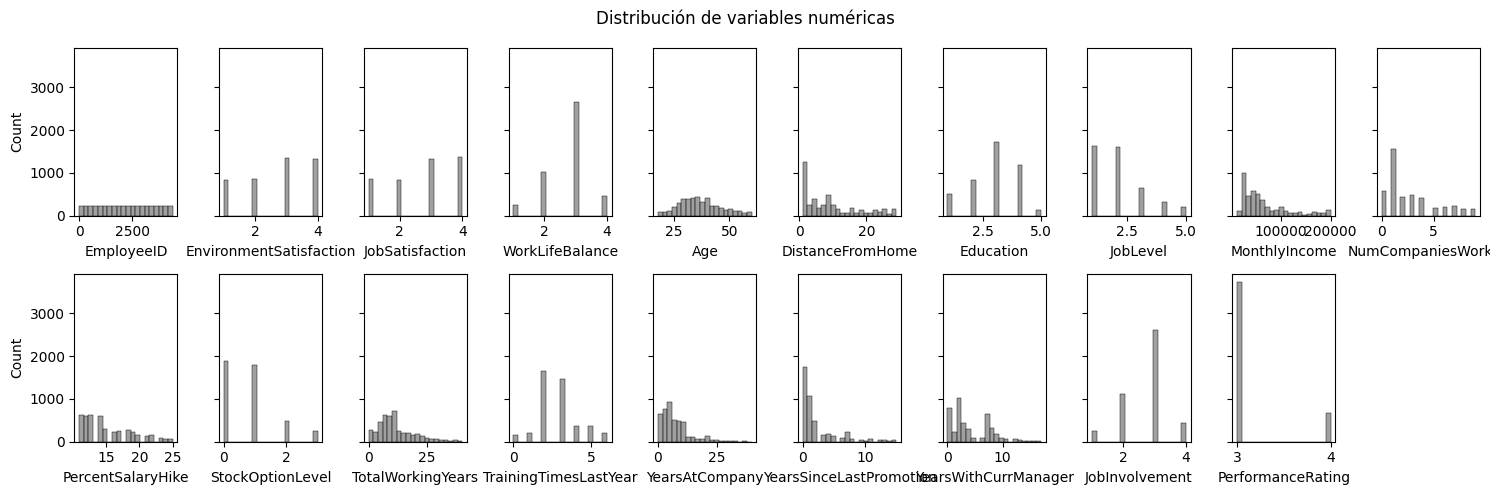

In [157]:
visualizador.plot_numericas()

EmployeeID es un identificado único, que de momento conservamos, lo trataremos como una etiqueta, y por tanto una variable categorica

EnvironmentSatisfaction,JobSatisfaction y WorklifeBalance toman unos pocos valores, tiene sentido interpretarlas como variables categóricas que ademas imponen orden.

Hacemos lo mismo con las variables categóricas

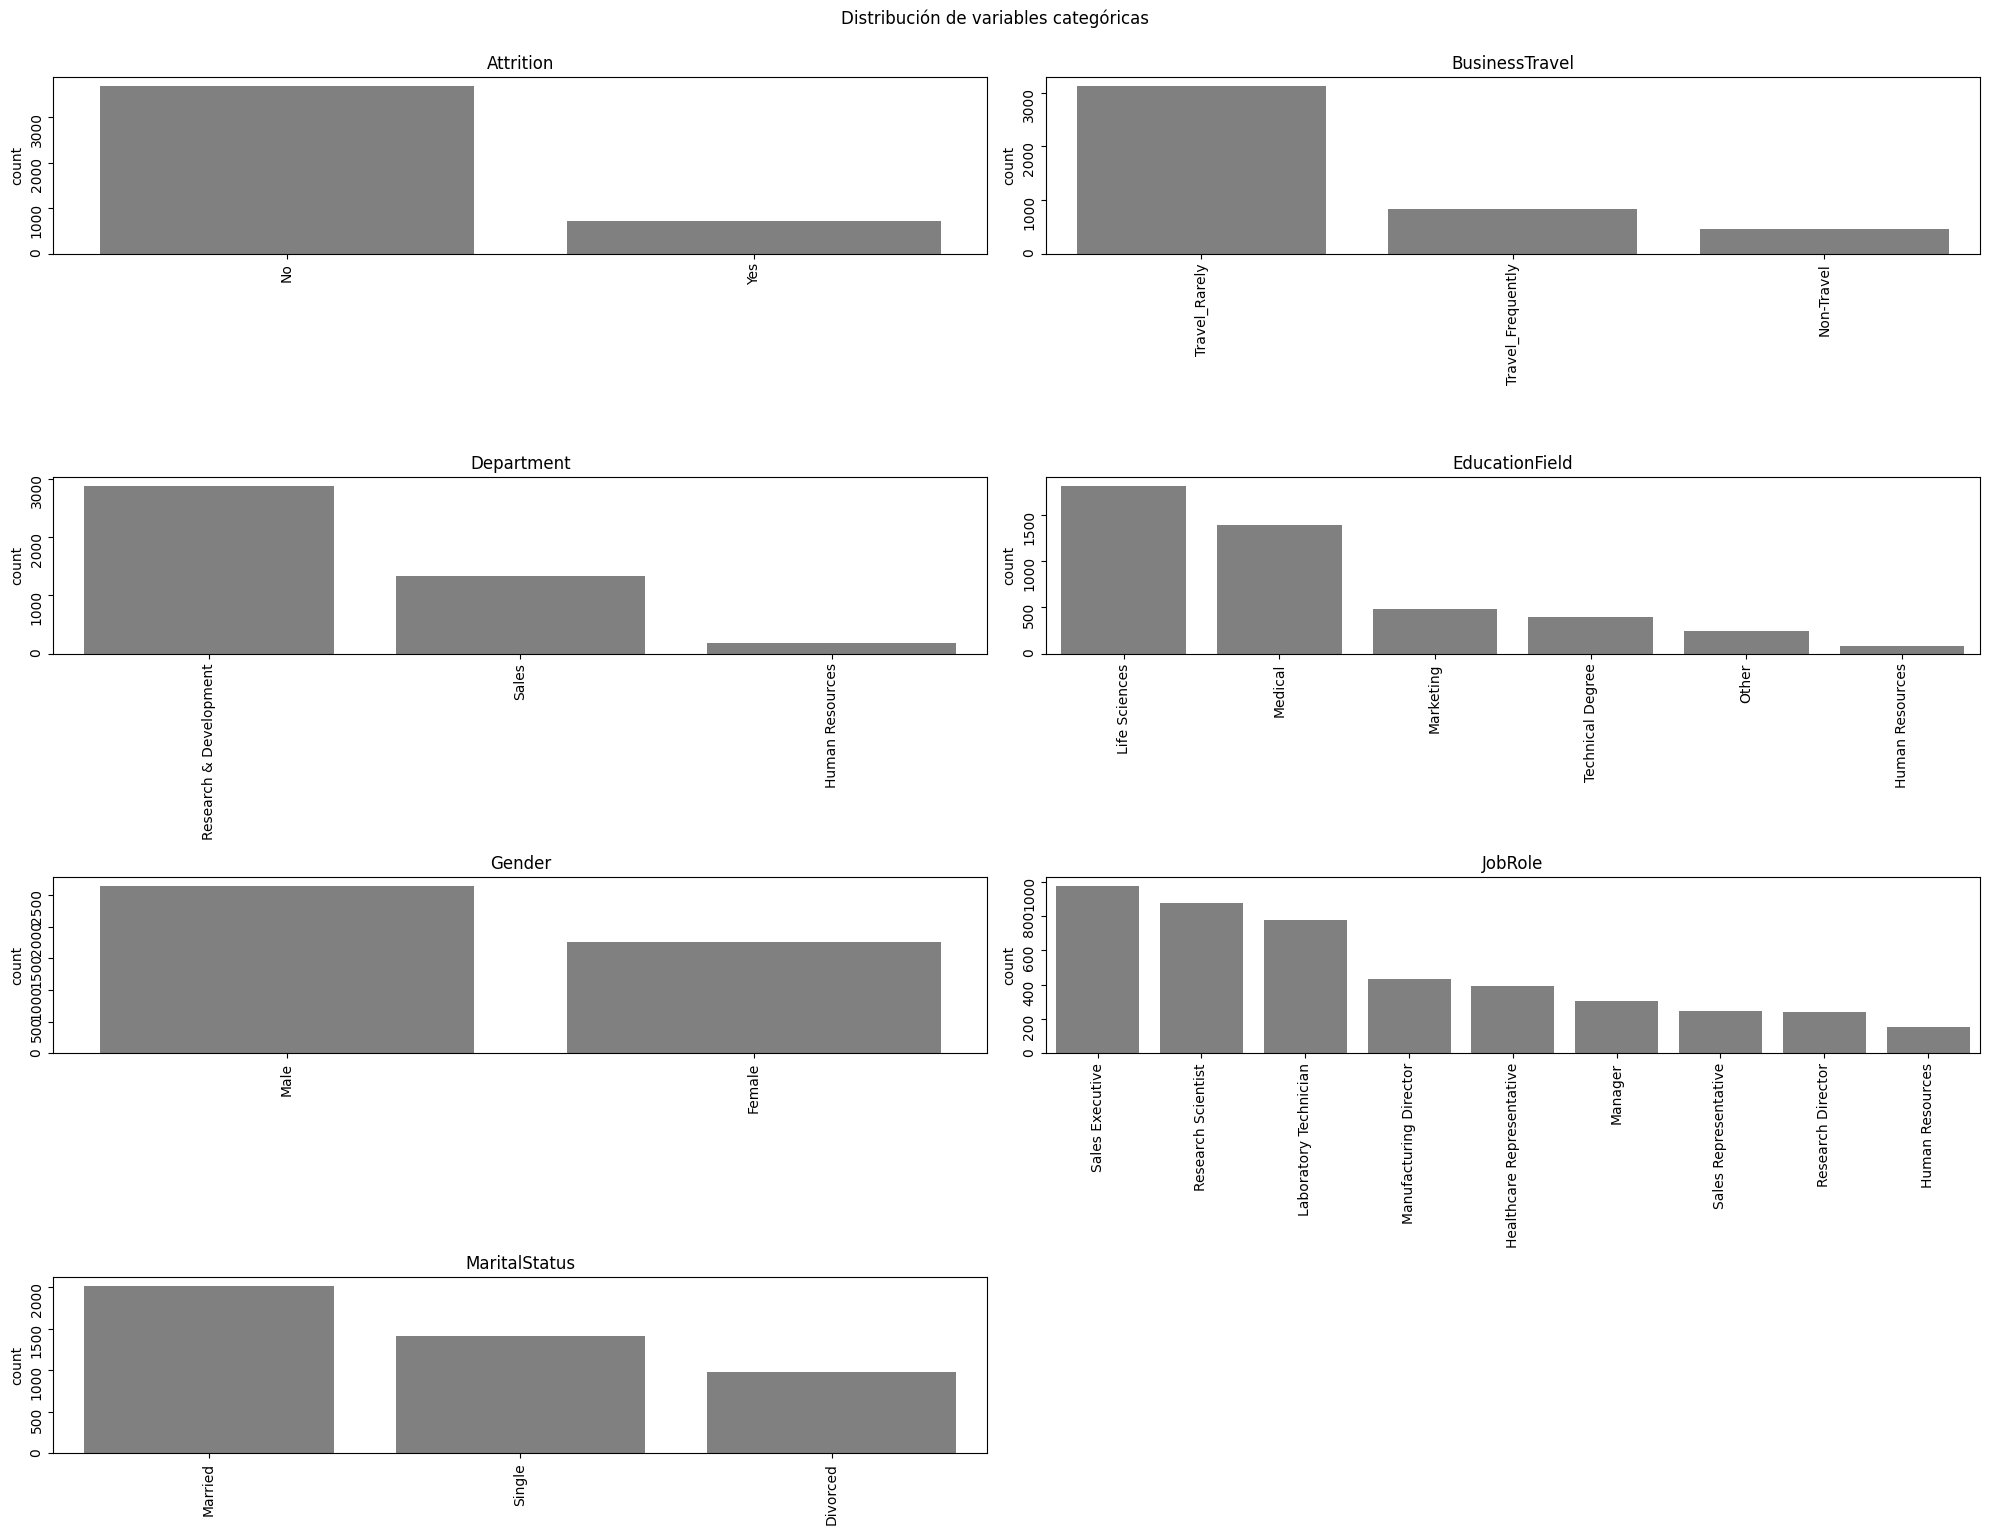

In [158]:
visualizador.plot_categoricas()

Apreciamos un desbalanceo muy acusado en la variable respuesta Attrition

In [159]:
df[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']] = df[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].astype('object')


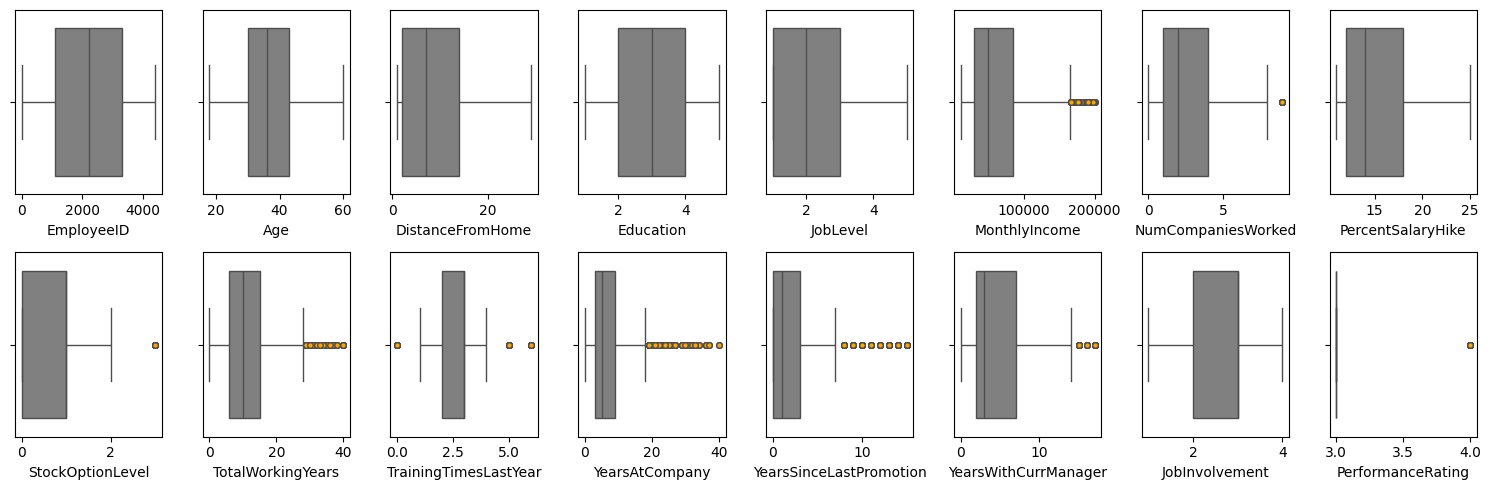

In [160]:
visualizador.deteccion_outliers()